In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
%matplotlib inline

In [17]:
rhpass=pd.read_csv("filter_ftp_scan_win2003.csv", parse_dates=['Time'])
rhpass.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,2157,2011-11-15 12:30:34,10.10.10.25,10.10.10.20,FTP,93,Response: 220-Microsoft FTP Service
1,2174,2011-11-15 12:30:34,10.10.10.25,10.10.10.20,FTP,82,Response: 220 FTP SERVER
2,135791,2011-11-15 12:32:29,10.10.10.25,10.10.10.20,FTP,93,Response: 220-Microsoft FTP Service
3,135811,2011-11-15 12:32:29,10.10.10.25,10.10.10.20,FTP,82,Response: 220 FTP SERVER
4,136085,2011-11-15 12:32:33,10.10.10.25,10.10.10.20,FTP,93,Response: 220-Microsoft FTP Service


In [18]:
rhpass["Type"] = rhpass.apply(lambda x: "Client" if x["Source"] == rhpass.irow(0)["Source"] else "Server", axis=1)

In [19]:
rhpass.head()

,No.,Time,Source,Destination,Protocol,Length,Info,Type
0,2157,2011-11-15 12:30:34,10.10.10.25,10.10.10.20,FTP,93,Response: 220-Microsoft FTP Service,Client
1,2174,2011-11-15 12:30:34,10.10.10.25,10.10.10.20,FTP,82,Response: 220 FTP SERVER,Client
2,135791,2011-11-15 12:32:29,10.10.10.25,10.10.10.20,FTP,93,Response: 220-Microsoft FTP Service,Client
3,135811,2011-11-15 12:32:29,10.10.10.25,10.10.10.20,FTP,82,Response: 220 FTP SERVER,Client
4,136085,2011-11-15 12:32:33,10.10.10.25,10.10.10.20,FTP,93,Response: 220-Microsoft FTP Service,Client


In [20]:
infodata2 = rhpass[['Length','Time','Info']]
infodata2.head()

,Length,Time,Info
0,93,2011-11-15 12:30:34,Response: 220-Microsoft FTP Service
1,82,2011-11-15 12:30:34,Response: 220 FTP SERVER
2,93,2011-11-15 12:32:29,Response: 220-Microsoft FTP Service
3,82,2011-11-15 12:32:29,Response: 220 FTP SERVER
4,93,2011-11-15 12:32:33,Response: 220-Microsoft FTP Service


In [21]:
infodata2 = infodata2.set_index('Time')
infodata2.head()

,Length,Info
Time,,
2011-11-15 12:30:34,93,Response: 220-Microsoft FTP Service
2011-11-15 12:30:34,82,Response: 220 FTP SERVER
2011-11-15 12:32:29,93,Response: 220-Microsoft FTP Service
2011-11-15 12:32:29,82,Response: 220 FTP SERVER
2011-11-15 12:32:33,93,Response: 220-Microsoft FTP Service


In [22]:
infodata2.resample('T',how=sum).head()

,Length
Time,
2011-11-15 12:30:00,175
2011-11-15 12:31:00,NaN
2011-11-15 12:32:00,1206
2011-11-15 12:33:00,845
2011-11-15 12:34:00,1701


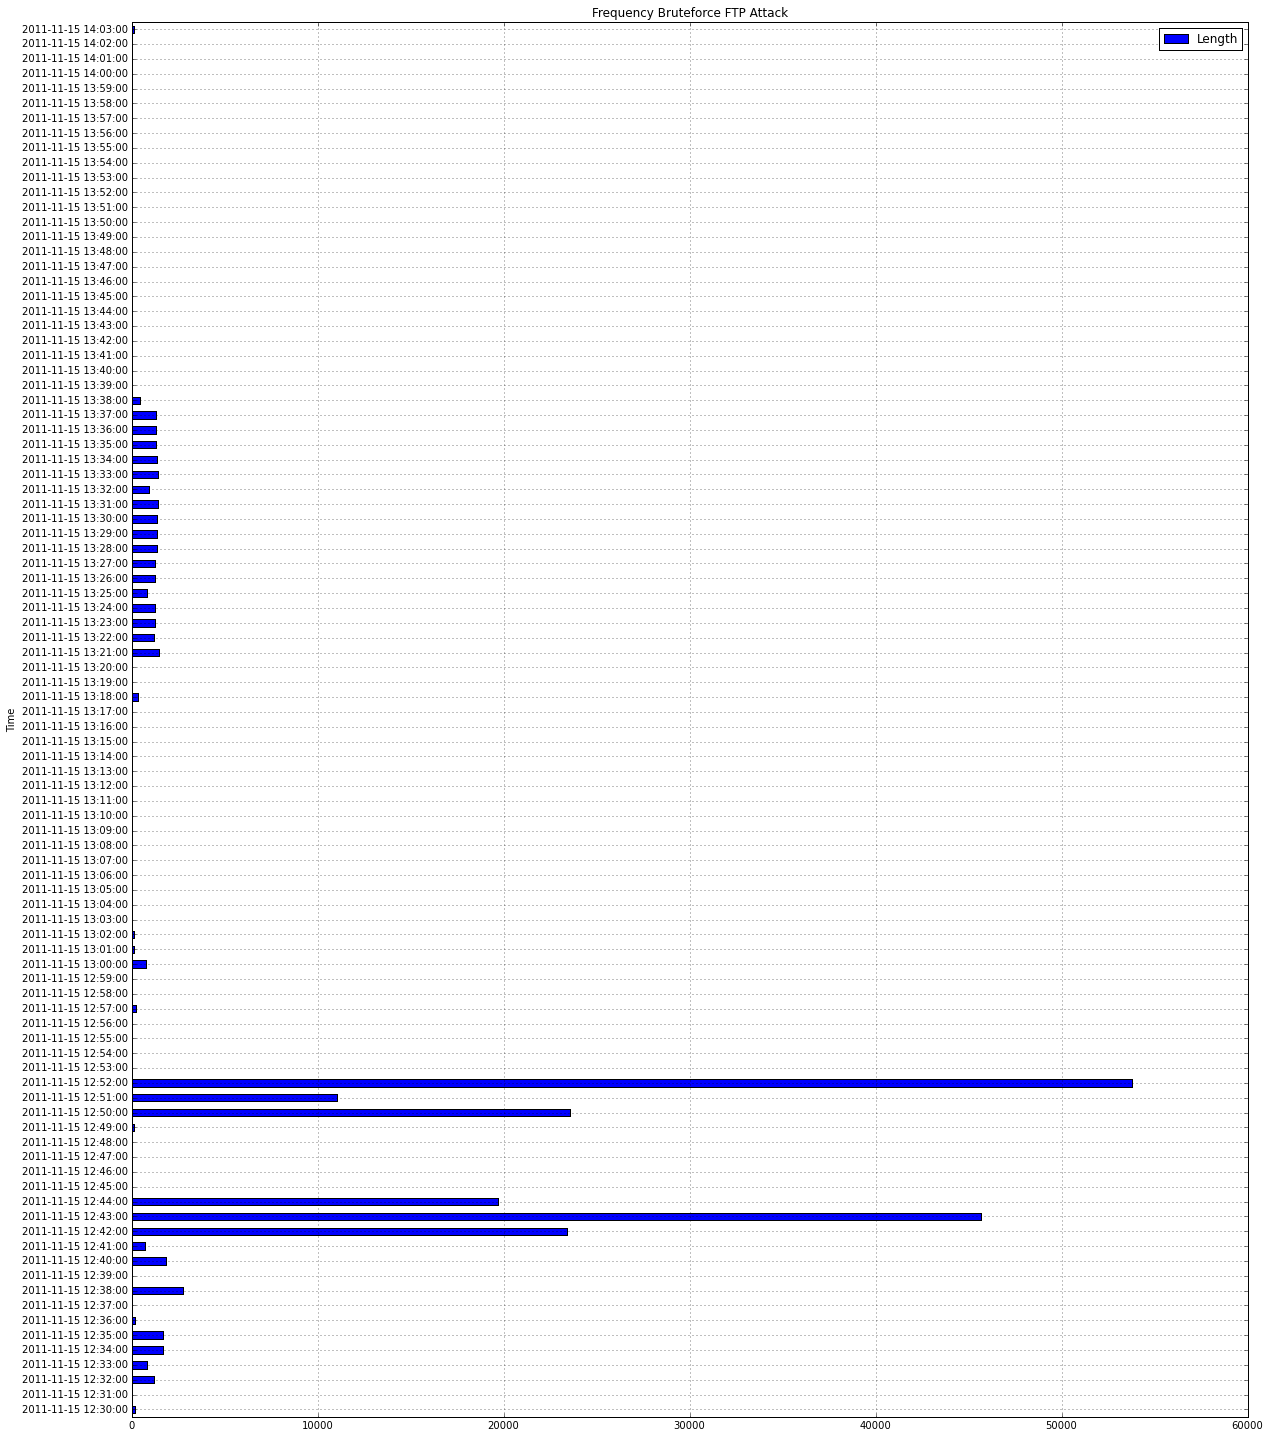

In [23]:
infodata2_plot = infodata2.resample('T',how=sum).plot(kind="barh",title="Frequency Bruteforce FTP Attack",figsize=(20,25),legend=True)

In [24]:
fig = infodata2_plot.get_figure()
fig.savefig("Frekuensi Bruteforce FTP Win2003 time.png")

In [25]:
rhpass.head()

,No.,Time,Source,Destination,Protocol,Length,Info,Type
0,2157,2011-11-15 12:30:34,10.10.10.25,10.10.10.20,FTP,93,Response: 220-Microsoft FTP Service,Client
1,2174,2011-11-15 12:30:34,10.10.10.25,10.10.10.20,FTP,82,Response: 220 FTP SERVER,Client
2,135791,2011-11-15 12:32:29,10.10.10.25,10.10.10.20,FTP,93,Response: 220-Microsoft FTP Service,Client
3,135811,2011-11-15 12:32:29,10.10.10.25,10.10.10.20,FTP,82,Response: 220 FTP SERVER,Client
4,136085,2011-11-15 12:32:33,10.10.10.25,10.10.10.20,FTP,93,Response: 220-Microsoft FTP Service,Client


In [26]:
category_group=rhpass.groupby(['Source','Destination','Protocol']).sum()
category_group.head()

No.  Length
Source      Destination Protocol                   
10.10.10.15 10.10.10.25 FTP       221916639   72359
10.10.10.20 10.10.10.25 FTP         6113250    2989
10.10.10.25 10.10.10.15 FTP       391138724  127106
            10.10.10.20 FTP        17065523    9940

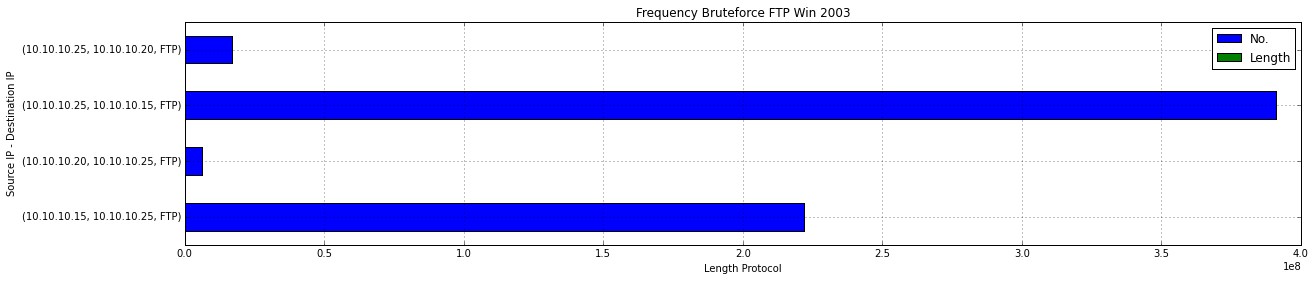

In [27]:
my_plot = category_group.plot(kind='barh',stacked=True,title="Frequency Bruteforce FTP Win 2003",figsize=(20,4))
my_plot.set_xlabel("Length Protocol")
my_plot.set_ylabel("Source IP - Destination IP")

In [28]:
fig = infodata2_plot.get_figure()
fig.savefig("Frekuensi Bruteforce FTP Win 2003.png")